In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
datas = pd.read_csv('iris.csv');
data = datas[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]];
data = (data-data.min())/(data.max()-data.min())
#data = data.sample(frac=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [2]:
iterasi = 100
lr = 0.5
lrbaru = lr
redlr = 20;
neighbour = 0.3;
neighbourbaru = neighbour
redneighbour = 63;
kelas = 3;
w =np.random.rand(data.shape[1],kelas)

In [3]:
for iters in range(1,iterasi):
    for i in range(0,data.shape[0]):
        a = np.array(data.iloc[i]);
        result =[];
        for b in range(0,kelas):
            hasil = np.sqrt(np.sum(np.square(a-w[:,b])))
            result.append(hasil);
        index = result.index(min(result));
        for j in range(0,kelas):
            radius = np.sum(np.square(w[:,index]-w[:,j]))
            topologi = math.exp(-radius/(2*(neighbourbaru**2)));
            deltaw = lrbaru*topologi*(a-w[:,j]);
            w[:,j] = w[:,j]+deltaw;
    lrbaru = lr*math.exp(-iters/redlr);
    neighbourbaru = neighbour*math.exp(-iters/redneighbour);
    if(lrbaru<0.002):
        break

In [4]:
lists=[]
for i in range(0,data.shape[0]):
    a = np.array(data.iloc[i]);
    result =[];
    for b in range(0,kelas):
        hasil = np.sqrt(np.sum(np.square(a-w[:,b])))
        result.append(hasil);
    lists.append(result.index(min(result)));

In [5]:
kelas=np.array(lists)

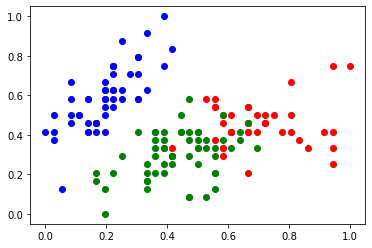

In [6]:
plt.plot(data.iloc[np.where(kelas==0)]['SepalLengthCm'],data.iloc[np.where(kelas==0)]['SepalWidthCm'],'bo',data.iloc[np.where(kelas==1)]['SepalLengthCm'],data.iloc[np.where(kelas==1)]['SepalWidthCm'],'ro',data.iloc[np.where(kelas==2)]['SepalLengthCm'],data.iloc[np.where(kelas==2)]['SepalWidthCm'],'go')